# Week 8

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [3]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn names:\n", df.columns)

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000



Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Column names:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Different k Values and Distance Metrics

In [6]:
results = []

for metric in ['euclidean', 'manhattan']:
    for k in range(1, 16):
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({'k': k, 'metric': metric, 'accuracy': acc})

results_df = pd.DataFrame(results)

Plot Accuracy vs. k for Each Metric

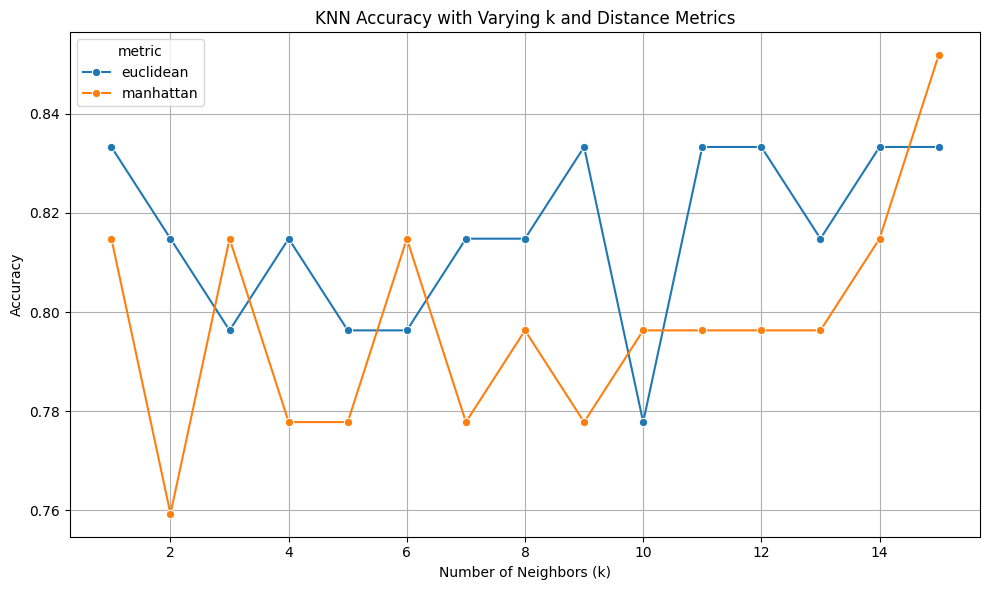

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k', y='accuracy', hue='metric', marker='o')
plt.title('KNN Accuracy with Varying k and Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

Evaluate Best Model

In [8]:
best_result = results_df.sort_values(by='accuracy', ascending=False).iloc[0]
best_k = best_result['k']
best_metric = best_result['metric']

print(f"\nBest KNN Model: k = {best_k}, metric = {best_metric}, accuracy = {best_result['accuracy']:.4f}")


Best KNN Model: k = 15, metric = manhattan, accuracy = 0.8519


Train Best Model

In [9]:
best_knn = KNeighborsClassifier(n_neighbors=int(best_k), metric=best_metric)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

Evaluate Metrics

In [10]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Confusion Matrix:
[[26  4]
 [ 4 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54

Accuracy: 0.8519
